# Informe del dataset de mujeres ajedrecistas

## Contexto
La Federación Internacional de Ajedrez (FIDE) gobierna la competencia internacional de ajedrez. La FIDE utilizó el sistema de clasificación Elo para calcular los niveles de habilidad relativos de los jugadores.

## Dataset
El dataset contiene detalles de las mejores jugadoras de ajedrez en el mundo ordenados por su calificación FIDE estándar (de mayor a menor por encima de 1800 Elo) según se actualizó en agosto de 2020. Los datos incluyen a todos los jugadores activos e inactivos que se pueden identificar mediante la columna Inactive_flag.

Nota: Todas las calificaciones se actualizan según lo publicado por FIDE en agosto de 2020.

## Referencias
FIDE: https://www.fide.com/
Kaggle: https://www.kaggle.com

### Importación de ibrerias

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga del dataset

In [166]:
ruta = 'data/top_women_chess_players_aug_2020.csv'
df = pd.read_csv(ruta)
print(df)

      Fide id                     Name Federation Gender  Year_of_birth Title  \
0      700070            Polgar, Judit        HUN      F         1976.0    GM   
1     8602980               Hou, Yifan        CHN      F         1994.0    GM   
2     5008123            Koneru, Humpy        IND      F         1987.0    GM   
3     4147103  Goryachkina, Aleksandra        RUS      F         1998.0    GM   
4      700088            Polgar, Susan        HUN      F         1969.0    GM   
...       ...                      ...        ...    ...            ...   ...   
8548  3302288        Reinkens, Natalia        BOL      F            NaN   NaN   
8549   343960        Saffova, Michaela        CZE      F         1994.0   NaN   
8550  5038294         Shetye, Siddhali        IND      F         1992.0   NaN   
8551  2072491            Trakru, Priya        USA      F         2001.0   WFM   
8552  4666399      Vorpahl, Sina Fleur        GER      F         1982.0   NaN   

      Standard_Rating  Rapi

### Información extra del dataset

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8553 entries, 0 to 8552
Data columns (total 10 columns):
Fide id            8553 non-null int64
Name               8553 non-null object
Federation         8553 non-null object
Gender             8553 non-null object
Year_of_birth      8261 non-null float64
Title              3118 non-null object
Standard_Rating    8553 non-null int64
Rapid_rating       3608 non-null float64
Blitz_rating       3472 non-null float64
Inactive_flag      5852 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 668.3+ KB


### Explicacion de algunos valores
En la columna de titulos (**Title**) encontraremos abreviaciones de los títulos reconocido por la FIDE

    -GM: Grand Master
    -IM: International Master
    -FM: FIDE Master
    -CM: Candidate Master
Siendo el GM el título más alto al que se puede aspirar
 
Por otro lado las columnas de:
Standard_Rating  Rapid_rating  Blitz_rating

Representan el rating de las jugadores en diferentes modos de juego:

    -Estandar: 90 minutos para los primeros 40 movimientos seguidos de 30 minutos para el resto del juego
    -Rapid: Cada jugador dispone de 15 minutos más 10 segundos adicionales por cada jugada
    -Blitz: cada jugador tiene 3 minutos más 2 segundos adicionales por movimiento
    
Por último la columna de **Inactive_flag** tendra el valor de **wi** (woman inactive) en caso de que la jugadores no se encuentra activa caso contrario tendra NaN

## Preguntas

### 1. ¿Quién es la mejor ajedrecista según su rating FIDE?

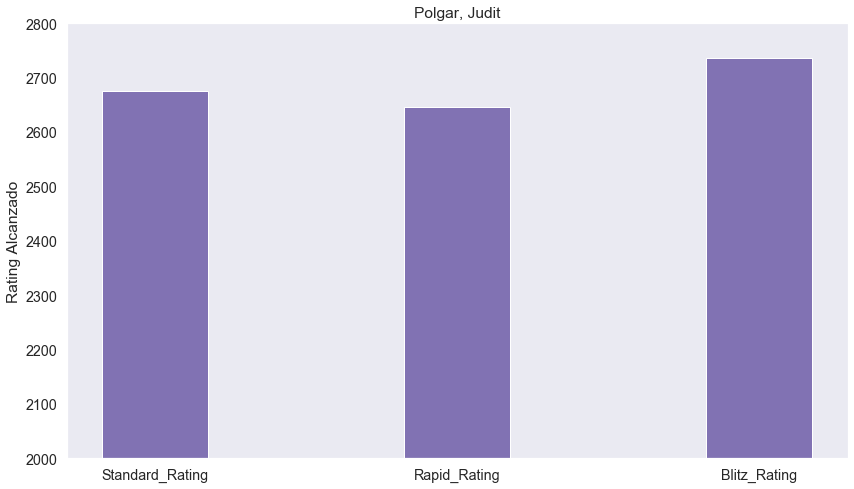

In [237]:
def barrasVertical(titulo, anchoBarra, n, y, etiquetaY, etiquetaX, limiteY,color):
    plt.figure(figsize=(14,8))
    plt.title(titulo)
    x = np.arange(n)
    plt.ylabel(etiquetaY)
    plt.xticks(x, (etiquetaX))
    plt.bar(x,y,anchoBarra, color= color)
    plt.ylim(limiteY)
    plt.show()
    
ancho = 0.35 
y = df[['Standard_Rating','Rapid_rating','Blitz_rating']]
y = y.loc[0]
etiquetaX = ['Standard_Rating','Rapid_Rating','Blitz_Rating']
limiteY=(2000,2800)
barrasVertical(df['Name'][0], ancho, 3, y, 'Rating Alcanzado', etiquetaX, limiteY, 'm')

#### Judit Polgar, es la mejor según su rating de las 3 modalidades de ajedrez, destacando principalmente en el modo Blitz

### ¿Quienes lideran el top 10 de mejores ajedrecistas en modo Standard?

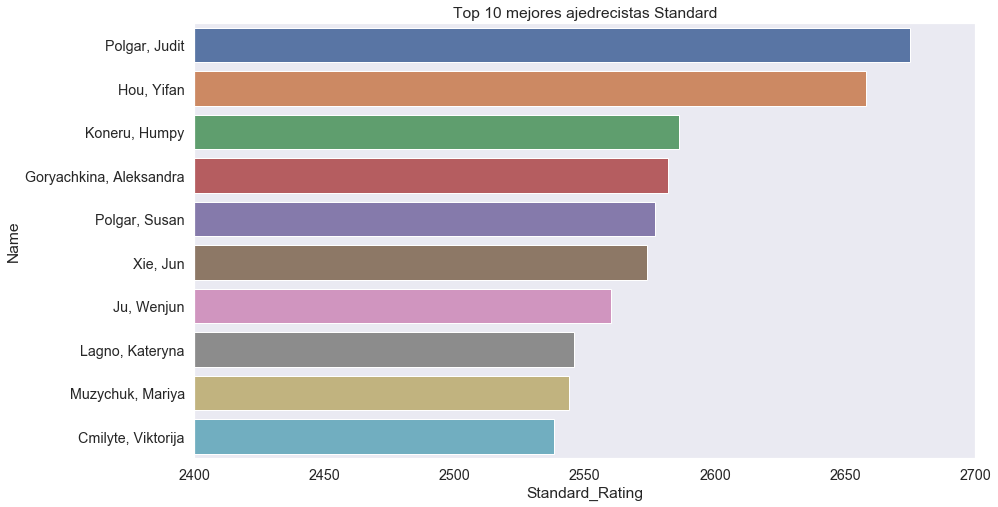

In [179]:
def barrasHorizontal(titulo, dataFrame, etiquetaX, etiquetaY, limiteX):
    plt.figure(figsize=(14,8))
    plt.title(titulo)
    sns.barplot(x = etiquetaX, y = etiquetaY, data=dataFrame).set_xlim(limiteX)
    plt.show()

top_10 = df.head(10)
limiteX=(2400,2700)
barrasHorizontal("Top 10 mejores ajedrecistas Standard", top_10, 'Standard_Rating', 'Name', limiteX)

#### Como se puede ver las 10 mujeres que lideran el top en modo Standard apenas tienen diferencia en sus puntos, siendo la diferencia poco más de 200 puntos entre la décima jugadora y la primera

### ¿Quienes lideran el top 10 de mejores ajedrecistas en modo Rapid?

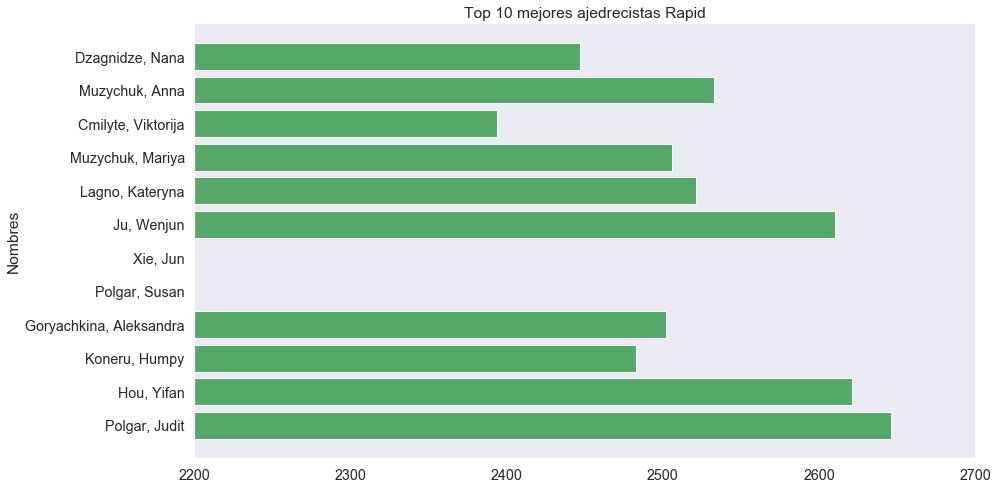

In [234]:
def barrasHorizontalesPlt(titulo, n, xValores, yValores, etiquetaY, limiteX, color):
    plt.figure(figsize=(14,8))
    plt.title(titulo)
    plt.ylabel(etiquetaY)
    y_pos = np.arange(n)
    plt.barh(y_pos, xValores, color = color)
    plt.yticks(y_pos, yValores)
    plt.xlim(limiteX)
    plt.show()

top_12 = df.head(12)
nombres = []
for nombre in (top_12['Name']):
    nombres.append(nombre)

ratings = []
for rating in (top_12['Rapid_rating']):
    ratings.append(rating)
limiteX = (2200,2700)
barrasHorizontalesPlt("Top 10 mejores ajedrecistas Rapid", len(nombres), ratings, nombres, 'Nombres', limiteX, 'g')


#### Estos son las mejores jugadores en modo Rapid, Jun Xie y Susan Polgar no tienen datos oficiales en esta modalidad, y rellenar estos valores sería un error ya que solo la FIDE puede proporcionar los ratings de las ajedrecistas, por tanto se opto por incluir 2 ajedrecistas más para llenar el vacio de dichas jugadoras